###**CREDIT CARD TRANSACTION FRAUD DETECTION**

## GIỚI THIỆU TẬP DỮ LIỆU VÀ MỤC TIÊU BÀI TOÁN

### Tập dữ liệu

Tập dữ liệu "Credit Card Transactions Fraud Detection Dataset" chứa thông tin về các giao dịch thẻ tín dụng. Mỗi dòng trong tập dữ liệu đại diện cho một giao dịch duy nhất với các đặc trưng (features) mô tả giao dịch đó. Mục tiêu chính là sử dụng các đặc trưng này để xác định xem giao dịch đó có phải là gian lận hay không.

Các cột dữ liệu thường bao gồm:
-   Thông tin về giao dịch (số tiền, thời gian, v.v.)
-   Thông tin về người dùng thực hiện giao dịch (ID, vị trí, v.v.)
-   Trạng thái của giao dịch (gian lận hoặc không gian lận - đây là biến mục tiêu).

### Mục tiêu bài toán

Mục tiêu chính của bài toán này là xây dựng một mô hình học máy có khả năng:
1.  **Phân loại chính xác:** Nhận diện và phân loại các giao dịch là gian lận (Fraud) hoặc không gian lận (Non-Fraud) dựa trên các đặc trưng của giao dịch.
2.  **Tối thiểu hóa sai sót:** Giảm thiểu cả lỗi dương tính giả (False Positives - dự đoán là gian lận nhưng thực tế không phải) và âm tính giả (False Negatives - dự đoán là không gian lận nhưng thực tế là gian lận). Lỗi âm tính giả đặc biệt quan trọng trong bài toán phát hiện gian lận vì nó đồng nghĩa với việc bỏ sót một giao dịch gian lận.
3.  **Xử lý dữ liệu mất cân bằng:** Giải quyết vấn đề số lượng giao dịch gian lận thường rất ít so với tổng số giao dịch, điều này có thể ảnh hưởng đến hiệu suất của mô hình.

Bài toán này đóng vai trò quan trọng trong việc bảo vệ người dùng khỏi bị thiệt hại tài chính và duy trì niềm tin vào hệ thống thanh toán thẻ tín dụng.

## CÁC BƯỚC THỰC HIỆN BÀI TOÁN

Để giải quyết bài toán phân loại gian lận thẻ tín dụng, chúng ta sẽ thực hiện theo các bước chính sau:

0. **Chuẩn bị dữ liệu**
    * Import các thư viện cần thiết

1.  **Khám phá dữ liệu (Data Exploration):**
    *   Tải tập dữ liệu.
    *   Tìm hiểu cấu trúc dữ liệu, các đặc trưng (features), kiểu dữ liệu của từng cột.
    *   Kiểm tra dữ liệu thiếu (missing values) và các giá trị ngoại lai (outliers).
    *   Phân tích phân phối của biến mục tiêu (gian lận/không gian lận) để hiểu rõ mức độ mất cân bằng dữ liệu.
    *   Trực quan hóa dữ liệu để khám phá mối quan hệ giữa các đặc trưng và biến mục tiêu.

2.  **Tiền xử lý dữ liệu (Data Preprocessing):**
    *   Xử lý dữ liệu không cần thiết
    *   Xử lý các giá trị ngoại lai (nếu cần).
    *   Mã hóa các biến phân loại (Categorical Encoding) nếu có.
    *   Chuẩn hóa hoặc co giãn dữ liệu số (Feature Scaling) để đưa các đặc trưng về cùng một phạm vi.
    *   Xử lý dữ liệu mất cân bằng (Handling Imbalanced Data)

3.  **Xây dựng và huấn luyện mô hình (Model Building & Training):**
    *   Chọn các thuật toán phân loại phù hợp cho bài toán (ví dụ: Logistic Regression, Decision Tree, Random Forest, Gradient Boosting, Support Vector Machine, Neural Networks).
    *   Chia tập dữ liệu thành tập huấn luyện (training set), tập kiểm định (validation set) và tập kiểm tra (test set).
    *   Huấn luyện mô hình trên tập huấn luyện.

4.  **Đánh giá mô hình (Model Evaluation):**
    *   Sử dụng các chỉ số đánh giá phù hợp với bài toán mất cân bằng dữ liệu (ví dụ: Precision, Recall, F1-Score, AUC-ROC Curve, Confusion Matrix) trên tập kiểm định và tập kiểm tra.
    *  Tùy chỉnh ngưỡng phân loại (Classification Thredholds)  của mô hình để cải thiện hiệu suất.

Chúng ta sẽ lần lượt đi qua từng bước này để xây dựng một mô hình phát hiện gian lận hiệu quả.

##BƯỚC 0: CHUẨN BỊ DỮ LIỆU



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## BƯỚC 1: KHÁM PHÁ DỮ LIỆU

In [ ]:
from google.colab import files
files.upload()   # chọn file kaggle.json vừa tải về

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aoi6688","key":"413718cd2441748a58eec46978f67f97"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle

# Tạo thư mục cấu hình và copy kaggle.json vào đúng chỗ
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Kiểm tra đăng nhập Kaggle CLI
!kaggle datasets list -s fraud -p 1 | head -n 20

ref                                                         title                                                   size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
mlg-ulb/creditcardfraud                                     Credit Card Fraud Detection                         69155672  2018-03-23 01:17:27.913000         964854      12436  0.85294116       
whenamancodes/fraud-detection                               Fraud Detection                                     69155672  2022-09-12 11:54:40.550000          11062        120  1.0              
dhanushnarayananr/credit-card-fraud                         Credit Card Fraud                                   30281243  2022-05-07 15:09:29.617000          25427        216  0.9411765        
ealaxi/paysim1                

In [ ]:
# Tải file .zip của dataset về thư mục làm việc (/content)
!kaggle datasets download -d kartik2112/fraud-detection

# Giải nén (tạo thư mục ./fraud_data để gọn gàng)
!mkdir -p fraud_data && unzip -q fraud-detection.zip -d fraud_data

# Liệt kê file giống như /kaggle/input
import os
for dirname, _, filenames in os.walk('/content/fraud_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Dataset URL: https://www.kaggle.com/datasets/kartik2112/fraud-detection
License(s): CC0-1.0
 88% 177M/202M [00:00<00:00, 394MB/s]
100% 202M/202M [00:00<00:00, 362MB/s]
/content/fraud_data/fraudTrain.csv
/content/fraud_data/fraudTest.csv


In [ ]:
train_path = "/content/fraud_data/fraudTrain.csv"
test_path  = "/content/fraud_data/fraudTest.csv"

# Đọc nhanh
data_train = pd.read_csv(train_path)
data_test  = pd.read_csv(test_path)

print(data_train.shape, data_test.shape)
data_train.head()

(1296675, 23) (555719, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
print(data_test.shape),print(data_train.shape)

(555719, 23)
(1296675, 23)


(None, None)

In [ ]:
data_test.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
data_train.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
data_test.info(), data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

(None, None)

In [ ]:
df = pd.concat([data_train, data_test], axis=0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [ ]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,1842743
1,9651


/tmp/ipython-input-2235499538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='is_fraud', data=df.reset_index(drop=True), palette='viridis')


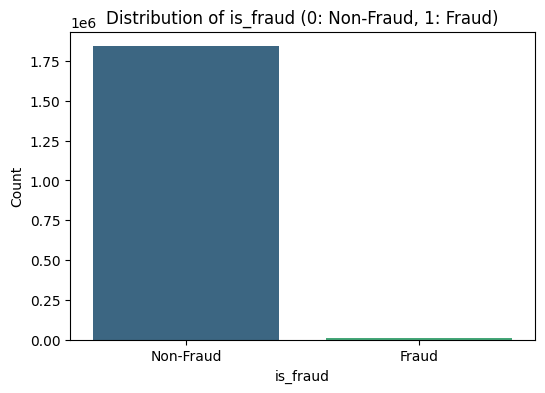

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='is_fraud', data=df.reset_index(drop=True), palette='viridis')
plt.title('Distribution of is_fraud (0: Non-Fraud, 1: Fraud)')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [ ]:
df.duplicated().sum()
#Kiểm tra xem có dòng nào bị trùng lặp hoàn toàn trong df không

np.int64(0)

In [ ]:
df.describe()
# Thông tin chi tiết thống kê cho các tính năng kiểu dữ liệu số

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.describe(include='object')
#thông tin chi tiết thống kê cho các tính năng kiểu dữ liệu không phải số

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2020-12-17 20:36:39,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,908 Brooks Brook,Birmingham,TX,Film/video editor,1977-03-23,1765bb45b3aa3224b4cdcb6e7a96cee3
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


# BƯỚC 2: TIỀN XỬ LÍ DỮ LIỆU

Dựa trên các phân tích dữ liệu ở trên, chúng ta sẽ thực hiện các bước tiền xử lý dữ liệu sau:

1.  **Xử lý cột 'dob' và tạo đặc trưng 'age'**.
2.  **Xử lý dữ liệu ngoại lai**
3.  **Chia tập dữ liệu**
4.  **Mã hóa các biến phân loại**
4.  **Chuẩn hóa hoặc co giãn dữ liệu số**
5.  **Xử lý dữ liệu mất cân bằng**


#**DROP**

Những cột sau được loại bỏ khỏi tập dữ liệu:

* **Unnamed:0, trans_num, cc_num, first, last**: Đây là những cột chứa thông tin **định danh cá nhân** (chỉ số, số giao dịch, số thẻ, tên) và không có giá trị dự đoán. Việc loại bỏ giúp **ngăn ngừa overfitting** và **bảo vệ quyền riêng tư**.
* **unix_time**: Cột này bị loại bỏ vì thông tin thời gian đã có trong cột **trans_date_trans_time** với định dạng dễ đọc hơn.
* **street, city**: Thông tin địa chỉ chi tiết không cần thiết. Các đặc trưng về vị trí tổng quát hơn như **state, lat, long, và city_pop** đã đủ để xác định các mẫu liên quan đến vị trí địa lý của giao dịch.

### Lợi ích của việc loại bỏ các cột trên

Việc loại bỏ các cột không cần thiết mang lại nhiều lợi ích:

* **Tăng tốc độ xử lý**: Giảm kích thước dữ liệu giúp quá trình xử lý và huấn luyện mô hình nhanh hơn.
* **Giảm nhiễu**: Loại bỏ các đặc trưng không liên quan giúp mô hình tập trung vào các yếu tố quan trọng.
* **Cải thiện hiệu suất mô hình**: Ngăn ngừa overfitting, giúp mô hình học được các mẫu chung thay vì các định danh cụ thể.
* **Bảo vệ quyền riêng tư**: Loại bỏ thông tin nhận dạng cá nhân, giảm thiểu rủi ro bảo mật.

In [ ]:
df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'first', 'last', 'unix_time', 'trans_num', 'street', 'city'], inplace=True)

In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')

 Chuyển đổi thông tin thời gian từ một cột duy nhất sang các cột riêng lẻ (day, month, year, hour, minute). Điều này giúp mô hình học máy có thể dễ dàng sử dụng các đặc trưng thời gian này để phát hiện các mẫu liên quan đến gian lận (ví dụ: gian lận thường xảy ra vào những giờ hoặc ngày cụ thể).

In [ ]:
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute

df.drop(columns=['trans_date_trans_time'], inplace=True)

**TRƯC QUAN HÓA**
* Fraud Rate by Category, State, Gender
* Fraud Rate byJob Titles

/tmp/ipython-input-1165098584.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")
/tmp/ipython-input-1165098584.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")
/tmp/ipython-input-1165098584.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temp.index, y=temp.values, palette="viridis")


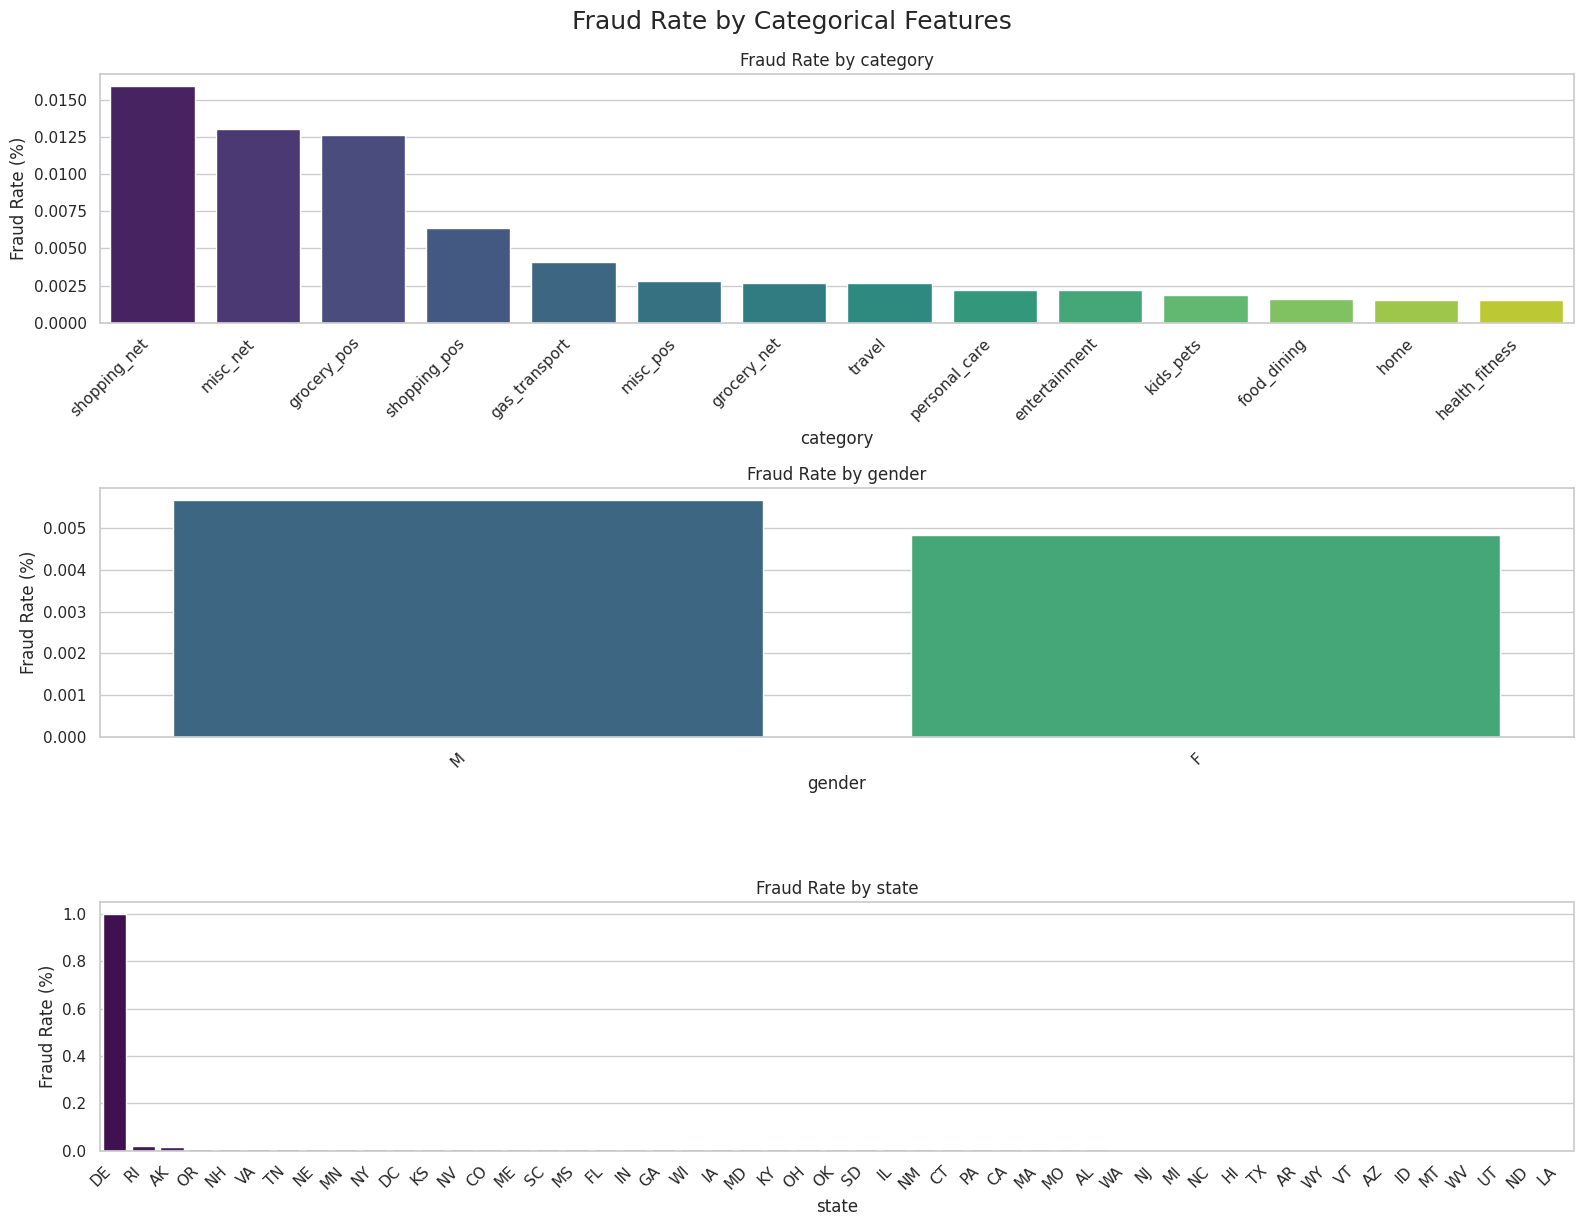

In [ ]:
data = df
# Danh sách các cột danh mục để so sánh
categorical_cols = ['category', 'gender', 'state']
# Loại biểu đồ
sns.set(style="whitegrid")
plt.figure(figsize=(16, 4 * len(categorical_cols)))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    temp = data.groupby(col)['is_fraud'].mean().sort_values(ascending=False)
    sns.barplot(x=temp.index, y=temp.values, palette="viridis")
    plt.ylabel('Fraud Rate (%)')
    plt.title(f'Fraud Rate by {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

plt.suptitle("Fraud Rate by Categorical Features", fontsize=18, y=1.02)
plt.show()

* Danh mục giao dịch (category) và Bang (state) có sự khác biệt rõ rệt về tỷ lệ gian lận. Đây có thể là những đặc trưng quan trọng.
* Giới tính (gender) cho thấy tỷ lệ gian lận tương đồng giữa nam và nữ, có thể ít quan trọng hơn trong việc phân biệt gian lận.

/tmp/ipython-input-688778381.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(top_states['state'], rotation=45, ha='right')
/tmp/ipython-input-688778381.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(bottom_states['state'], rotation=45, ha='right')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


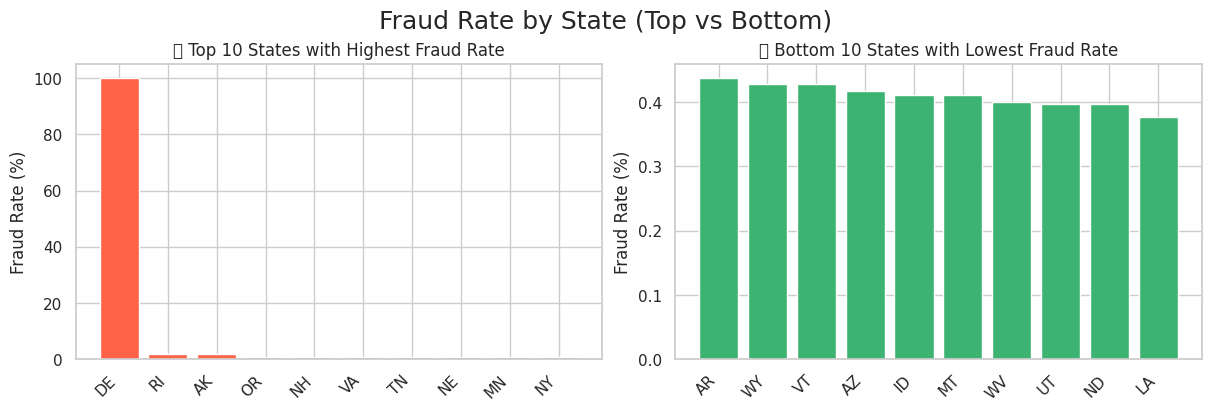

In [ ]:
# Tính toán tỷ lệ giao dịch gian lận cho mỗi bang.
state_grouped = (
    data.groupby('state')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate')
    .sort_values(by='fraud_rate', ascending=False)
)

top_states = state_grouped.head(10)
bottom_states = state_grouped.tail(10)

# Vẽ biểu đồ so sánh tỷ lệ gian lận giữa các bang.
fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)


# Top 10 States
axes[0].bar(top_states['state'], top_states['fraud_rate'], color='tomato')
axes[0].set_title('🔝 Top 10 States with Highest Fraud Rate')
axes[0].set_ylabel('Fraud Rate (%)')
axes[0].set_xticklabels(top_states['state'], rotation=45, ha='right')
# Bottom 10 States
axes[1].bar(bottom_states['state'], bottom_states['fraud_rate'], color='mediumseagreen')
axes[1].set_title('🔻 Bottom 10 States with Lowest Fraud Rate')
axes[1].set_ylabel('Fraud Rate (%)')
axes[1].set_xticklabels(bottom_states['state'], rotation=45, ha='right')

plt.suptitle('Fraud Rate by State (Top vs Bottom)', fontsize=18)
plt.show()

* Có sự biến động đáng kể về tỷ lệ gian lận giữa các bang ở Mỹ
* Xác định các khu vực rủi ro cao và thấp
* Tiềm năng cho đặc trưng vị trí địa lý

In [ ]:
def fraud_rate_by_time(feature):
    # Nhóm theo thời gian và trạng thái gian lận
    temp = data.groupby([feature, 'is_fraud'])['is_fraud'].count().unstack(fill_value=0)

    # Đổi tên
    temp.columns = ['non_fraud', 'fraud']

    # Thêm tổng số giao dịch và tỷ lệ gian lận
    temp['total_txn'] = temp['non_fraud'] + temp['fraud']
    temp['fraud_rate_%'] = (temp['fraud'] / temp['total_txn']) * 100

    return temp.sort_values(by=feature)

# Áp dụng với các đơn vị thời gian
fraud_by_year = fraud_rate_by_time('year')
fraud_by_month = fraud_rate_by_time('month')
fraud_by_day = fraud_rate_by_time('day')
fraud_by_hour = fraud_rate_by_time('hour')
fraud_by_minute = fraud_rate_by_time('minute')
# Hiển thị kết quả
print("Fraud Rate by Year:\n", fraud_by_year)
print("\n Fraud Rate by Month:\n", fraud_by_month)
print("\n Fraud Rate by Day:\n", fraud_by_day)
print("\n Fraud Rate by Hour:\n", fraud_by_hour)
print("\n Fraud Rate by Minute:\n", fraud_by_minute)

Fraud Rate by Year:
       non_fraud  fraud  total_txn  fraud_rate_%
year                                           
2019     919630   5220     924850      0.564416
2020     923113   4431     927544      0.477713

 Fraud Rate by Month:
        non_fraud  fraud  total_txn  fraud_rate_%
month                                           
1         103878    849     104727      0.810679
2          96804    853      97657      0.873465
3         142851    938     143789      0.652345
4         134292    678     134970      0.502334
5         145940    935     146875      0.636596
6         173048    821     173869      0.472195
7         171792    652     172444      0.378094
8         175321    797     176118      0.452538
9         139427    758     140185      0.540714
10        137268    838     138106      0.606780
11        142374    682     143056      0.476736
12        279748    850     280598      0.302924

 Fraud Rate by Day:
      non_fraud  fraud  total_txn  fraud_rate_%
day     

In [ ]:
# Tỉ lệ gian lận dựa vào "Job Title"
fraud_by_jobs = (
    data.groupby('job')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
    .sort_values(by='fraud_rate_%', ascending=False)
)
# Top 10 jobs with highest fraud rate
top_fraud_jobs = fraud_by_jobs.head(10)
print("Top 10 Jobs with Highest Fraud Rate:\n")
print(top_fraud_jobs.to_string(index=False))
print()
# Bottom 10 jobs with lowest fraud rate
bottom_fraud_jobs = fraud_by_jobs.tail(10)
print("\nBottom 10 Jobs with Lowest Fraud Rate:\n")
print(bottom_fraud_jobs.to_string(index=False))

Top 10 Jobs with Highest Fraud Rate:

                              job  fraud_rate_%
           Air traffic controller         100.0
                  Careers adviser         100.0
             Broadcast journalist         100.0
   Armed forces technical officer         100.0
       Contracting civil engineer         100.0
Sales promotion account executive         100.0
                      Ship broker         100.0
                Software engineer         100.0
                        Solicitor         100.0
                           Dancer         100.0


Bottom 10 Jobs with Lowest Fraud Rate:

                         job  fraud_rate_%
 Corporate investment banker      0.137127
Medical sales representative      0.136818
         Designer, furniture      0.114364
Designer, exhibition/display      0.091366
                Statistician      0.082305
            Health physicist      0.068587
                  Contractor      0.045809
    Engineer, communications      0.000000
     

/tmp/ipython-input-4290282287.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_fraud_jobs['job'], rotation=45, ha='right')
/tmp/ipython-input-4290282287.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(bottom_fraud_jobs['job'], rotation=45, ha='right')


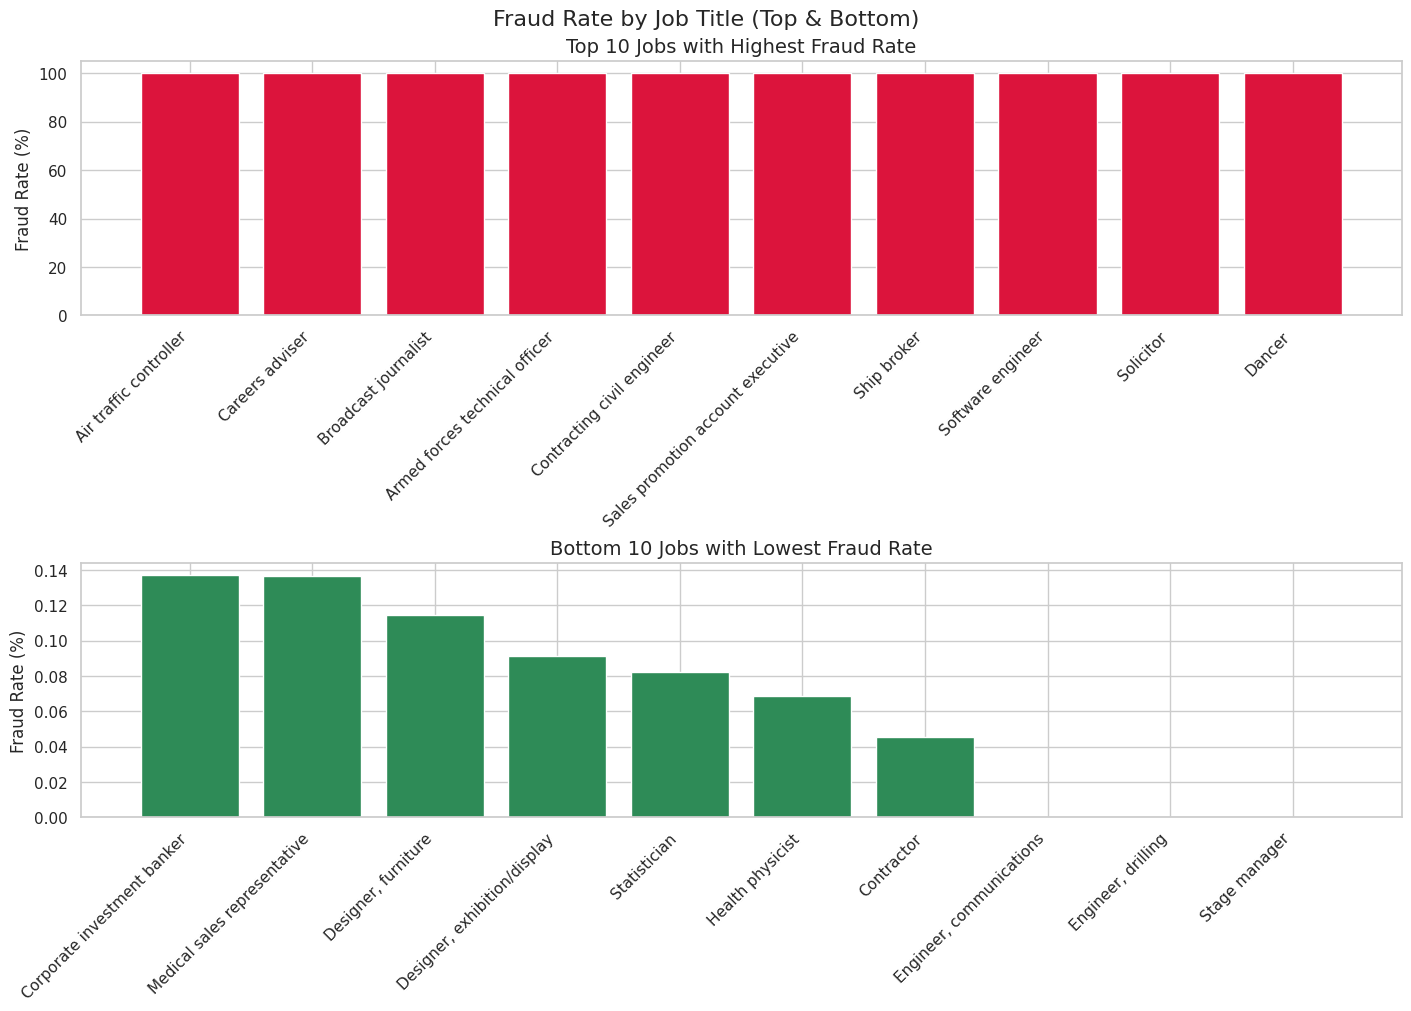

In [ ]:
#Trực quan hóa
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), constrained_layout=True)
# TOP10
ax1.bar(top_fraud_jobs['job'], top_fraud_jobs['fraud_rate_%'], color='crimson')
ax1.set_title('Top 10 Jobs with Highest Fraud Rate', fontsize=14)
ax1.set_ylabel('Fraud Rate (%)')
ax1.set_xticklabels(top_fraud_jobs['job'], rotation=45, ha='right')
# BOTTOM10
ax2.bar(bottom_fraud_jobs['job'], bottom_fraud_jobs['fraud_rate_%'], color='seagreen')
ax2.set_title('Bottom 10 Jobs with Lowest Fraud Rate', fontsize=14)
ax2.set_ylabel('Fraud Rate (%)')
ax2.set_xticklabels(bottom_fraud_jobs['job'], rotation=45, ha='right')

# Overall title
plt.suptitle('Fraud Rate by Job Title (Top & Bottom)', fontsize=16)
plt.show()

In [ ]:
ans = data.corr(numeric_only=True)
ans['is_fraud']
#Tính toán và hiển thị mối tương quan giữa cột 'is_fraud' và tất cả các cột số khác trong DataFrame

,is_fraud
amt,0.209308
zip,-0.002190
lat,0.002904
long,0.001022
city_pop,0.000325
merch_lat,0.002778
merch_long,0.000999
is_fraud,1.000000
day,-0.000131
month,-0.016417


In [ ]:
data.columns

Index(['merchant', 'category', 'amt', 'gender', 'state', 'zip', 'lat', 'long',
       'city_pop', 'job', 'dob', 'merch_lat', 'merch_long', 'is_fraud', 'day',
       'month', 'year', 'hour', 'minute'],
      dtype='object')

In [ ]:
df['is_fraud'].unique()

array([0, 1])

#2.1 TẠO ĐẶC TRƯNG AGE
* Xử lý cột ngày sinh ('dob') để tạo ra các đặc trưng liên quan đến tuổi.
* tạo ra cột 'age' có thể hữu ích trong mô hình dự đoán gian lận, vì tuổi tác liên quan đến hành vi giao dịch và khả năng thực hiện hoặc trở thành nạn nhân của gian lận.

In [ ]:
df['dob'] = pd.to_datetime(df['dob'])
df['year_dob'] = df['dob'].dt.year
df['age'] = df['year'] - df['year_dob']

/tmp/ipython-input-2073950995.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_group')['is_fraud']


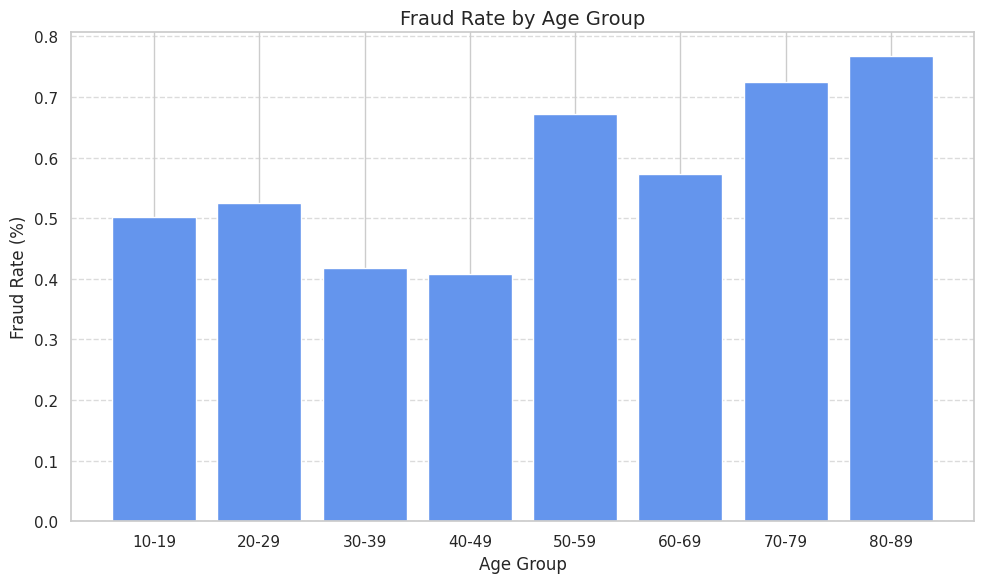

In [ ]:
##TỶ LỆ GIAN LẬN THEO TUỔI
# 1. Chia bin và gán nhãn
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
# 2. Tạo nhóm cột tuổi mới
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
# 3. Nhóm tuổi và tính toán tỉ lệ gian lận
age_grouped = (
    df.groupby('age_group')['is_fraud']
    .mean()
    .multiply(100)
    .reset_index(name='fraud_rate_%')
)
# 4. Trực quan hóa
plt.figure(figsize=(10, 6))
plt.bar(age_grouped['age_group'], age_grouped['fraud_rate_%'], color='cornflowerblue')
plt.title('Fraud Rate by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Fraud Rate (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 2.2 Xử lí dữ liệu ngoại lai
* Xử lí dữ liệu ngoại lai cột 'amt' (cột số tiền giao dịch) ta sử dụng IQR để xác định và loại bỏ các giá trị nằm ngoài phạm vi cho phép

In [ ]:
# Tính Q1, Q3
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
#Tính IQR
IQR = Q3 - Q1
# Xác định giới hạn
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#Loại bỏ ngoại lai
df_cleaned = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)].copy()

print(f"Original data shape: {df.shape}")
print(f"Data shape after removing outliers: {df_cleaned.shape}")

Original data shape: (1852394, 22)
Data shape after removing outliers: (1757340, 22)


#2.3 Chia tập dữ liệu
*Chia dữ liệu đã xử lý thành tập huấn luyện và tập kiểm tra. Tập kiểm tra phải được giữ nguyên, không áp dụng các bước tiền xử lý dựa trên dữ liệu huấn luyện.

In [ ]:
from sklearn.model_selection import train_test_split

#Tách riêng các tính năng và biến mục tiêu khỏi dữ liệu đã được làm sạch
X = df_cleaned.drop('is_fraud', axis=1)
y = df_cleaned['is_fraud']

#Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80/20)
#Sử dụng stratify=y để duy trì tỷ lệ các trường hợp gian lận trong cả hai tập
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1405872, 21)
Shape of X_test: (351468, 21)
Shape of y_train: (1405872,)
Shape of y_test: (351468,)


#Note:
* Sử dụng stratify=y khi chia tập dữ liệu là cực kỳ quan trọng trong các bài toán có dữ liệu mất cân bằng
  * Đảm bảo tính đại diện
  * Huấn luyện mô hình hiệu quả
  * Đánh giá mô hình đáng tin cậy

# 2.4 Mã hóa các biến phân loại
* Các cột như 'merchant', 'category', 'gender', 'state', 'job' là các biến phân loại. Huấn luyện các phương pháp mã hóa (như One-Hot Encoding và Target Encoding) chỉ trên tập huấn luyện, sau đó áp dụng các biến đổi đã học lên cả tập huấn luyện và tập kiểm tra.

In [ ]:
%pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.5 MB/s eta 0:00:00


In [ ]:
#Import thư viện cần thiết
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

# Tách đặc trưng và biến mục tiêu
X = df_cleaned.drop('is_fraud', axis=1)
y = df_cleaned['is_fraud']

# Drop columns that are not needed for training, including the original 'dob' and derived 'year_dob', 'age_group'
X = X.drop(columns=['dob', 'year_dob', 'age_group'], errors='ignore')

# Split the data into training and testing sets after dropping columns
# Use stratify=y to maintain the proportion of fraud cases in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Định nghĩa các cột cần mã hóa
onehot_cols = ['category', 'gender'] #Cột có số lượng giá trị duy nhất tương đối ít
target_cols = ['merchant', 'state', 'job'] #cardinality cao

# Get the names of the numerical columns remaining after dropping and before encoding
numerical_cols = [col for col in X_train.columns if col not in onehot_cols + target_cols]


# Tạo ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
        ('target', TargetEncoder(), target_cols),
        ('scaler', StandardScaler(), numerical_cols) # Apply scaler to numerical columns
    ],
    remainder='passthrough' # This should ideally be empty now
)

# Áp dụng các phép biến đổi
X_train_encoded = preprocessor.fit_transform(X_train, y_train)
X_test_encoded = preprocessor.transform(X_test)

print("Shape of X_train_encoded:", X_train_encoded.shape)
print("Shape of X_test_encoded:", X_test_encoded.shape)

Shape of X_train_encoded: (1405872, 32)
Shape of X_test_encoded: (351468, 32)


#2.5 Chuẩn hóa hoặc co giãn dữ liệu số
* Áp dụng các kỹ thuật scaling (như StandardScaler) chỉ trên tập huấn luyện, sau đó áp dụng các biến đổi đã học lên cả tập huấn luyện và tập kiểm tra.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define categorical columns for different encoding methods
onehot_cols = ['category', 'gender']
target_cols = ['merchant', 'state', 'job']

# Get the names of the passthrough columns (numerical)
passthrough_cols = [col for col in X_train.columns if col not in onehot_cols + target_cols]


# Create ColumnTransformer with all steps
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
        ('target', TargetEncoder(), target_cols),
        ('scaler', StandardScaler(), passthrough_cols) # Add StandardScaler
    ],
    remainder='passthrough' # Should be empty now, but keep for safety
)

# Fit the preprocessor on the training data
preprocessor.fit(X_train, y_train)

# Get the names of the columns after one-hot encoding
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(onehot_cols)
target_feature_names = target_cols # TargetEncoder keeps original column names


# Apply transformations
X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

Shape of X_train_scaled: (1405872, 32)
Shape of X_test_scaled: (351468, 32)


#StandardScaler được ưu tiên trong bài toán gian lận hơn MinMaxScaler;
* Ít nhạy cảm với phân phối dữ liệu (dù đã xử lí ngoại lai, dữ liệu vẫn có thể k theo phân phối hoàn hảo)
* Gỉa định của một số mô hình
* Khoảng giá trị không cố định cho phép giá trị ngoài khoảng [-1, 1]

#2.6 Xử lý dữ liệu mất cân bằng
* Biến mục tiêu 'is_fraud' có sự mất cân bằng nghiêm trọng (số lượng giao dịch gian lận rất ít). Chúng ta cần áp dụng các kỹ thuật để giải quyết vấn đề này (ví dụ: SMOTE, Undersampling, hoặc sử dụng các thuật toán/chỉ số đánh giá phù hợp).
* Chỉ áp dụng các kỹ thuật xử lý mất cân bằng (như SMOTE) lên tập dữ liệu huấn luyện đã được tiền xử lý. Tập kiểm tra vẫn giữ nguyên phân phối lớp ban đầu.


In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Shape of X_train_scaled before SMOTE:", X_train_scaled.shape)
print("Shape of X_train_resampled after SMOTE:", X_train_resampled.shape)
print("Shape of y_train before SMOTE:", y_train.shape)
print("Shape of y_train_resampled after SMOTE:", y_train_resampled.shape)

Shape of X_train_scaled before SMOTE: (1405872, 32)
Shape of X_train_resampled after SMOTE: (2808012, 32)
Shape of y_train before SMOTE: (1405872,)
Shape of y_train_resampled after SMOTE: (2808012,)


/tmp/ipython-input-3899702769.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')
/tmp/ipython-input-3899702769.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_resampled, palette='viridis')


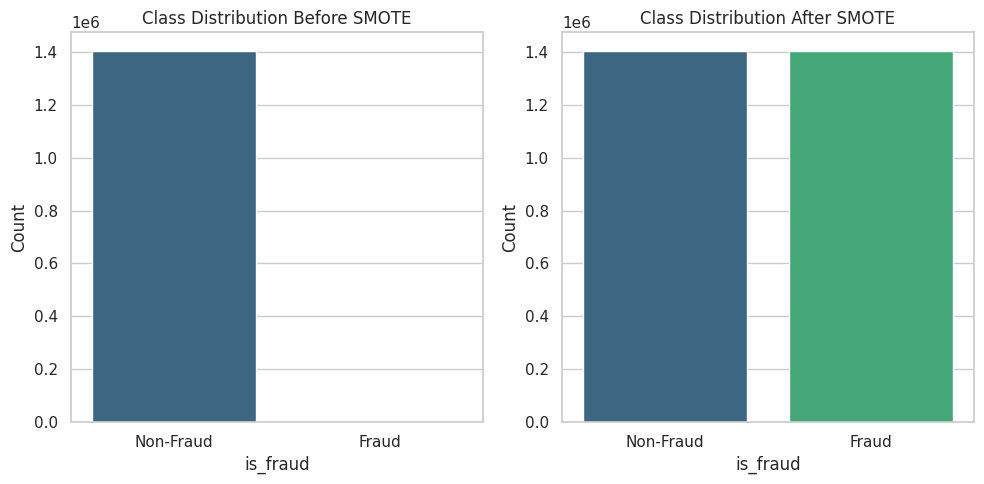

In [ ]:
# Hình dung sự phân bố lớp trước và sau SMOTE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette='viridis')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled, palette='viridis')
plt.title('Class Distribution After SMOTE')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])

plt.tight_layout()
plt.show()

#BƯỚC 3: XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

#3.1 LightGBM

In [ ]:
# Install LightGBM if you haven't already
%pip install lightgbm

import lightgbm as lgb

# Initialize the LightGBM classifier
# You can adjust hyperparameters later
lgbm_model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', random_state=42, n_jobs=-1)

# Train the model using the resampled training data
print("Training LightGBM model...")
lgbm_model.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

Training LightGBM model...
[LightGBM] [Info] Number of positive: 1404006, number of negative: 1404006
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.867388 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6891
[LightGBM] [Info] Number of data points in the train set: 2808012, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training complete.


In [ ]:
y_pred = lgbm_model.predict(X_test_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score
print("ROC_AUC_SCORE:",roc_auc_score(y_test,y_pred))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification_report:\n",classification_report(y_test,y_pred))

ROC_AUC_SCORE: 0.8646265836940977
Confusion_matrix:
 [[349168   1833]
 [   124    343]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    351001
           1       0.16      0.73      0.26       467

    accuracy                           0.99    351468
   macro avg       0.58      0.86      0.63    351468
weighted avg       1.00      0.99      1.00    351468



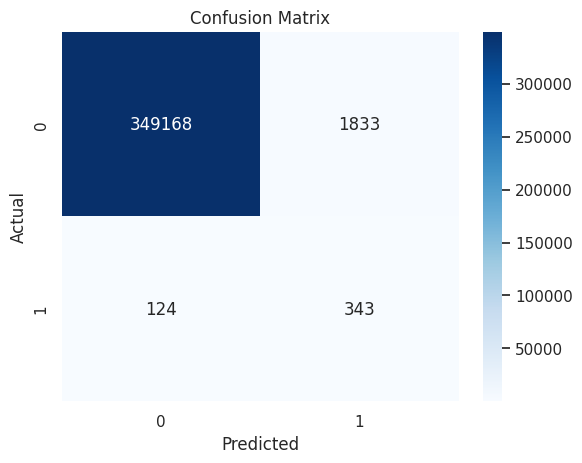

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* Khắc phục điểm yếu của mô hình LightGBM hiện tại (đặc biệt là Precision thấp)
  * Điều chỉnh ngưỡng phân loại (classification Threadhold)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Evaluating model performance at different thresholds:
------------------------------------------------------
Threshold | Precision | Recall  | F1-Score
------------------------------------------------------
0.10    | 0.0533  | 0.8694  | 0.1005
0.15    | 0.0665  | 0.8373  | 0.1232
0.20    | 0.0792  | 0.8244  | 0.1445
0.25    | 0.0906  | 0.8051  | 0.1628
0.30    | 0.1007  | 0.7794  | 0.1783
0.35    | 0.1128  | 0.7580  | 0.1963
0.40    | 0.1260  | 0.7537  | 0.2160
0.45    | 0.1395  | 0.7452  | 0.2351
0.50    | 0.1576  | 0.7345  | 0.2596
0.55    | 0.1731  | 0.7066  | 0.2781
0.60    | 0.1946  | 0.6895  | 0.3035
0.65    | 0.2206  | 0.6702  | 0.3319
0.70    | 0.2485  | 0.6403  | 0.3581
0.75    | 0.2930  | 0.6124  | 0.3964
0.80    | 0.3566  | 0.5696  | 0.4386
0.85    | 0.4410  | 0.5203  | 0.4774
0.90    | 0.5978  | 0.4711  | 0.5269
0.95    | 0.7897  | 0.3619  | 0.4963
------------------------------------------------------


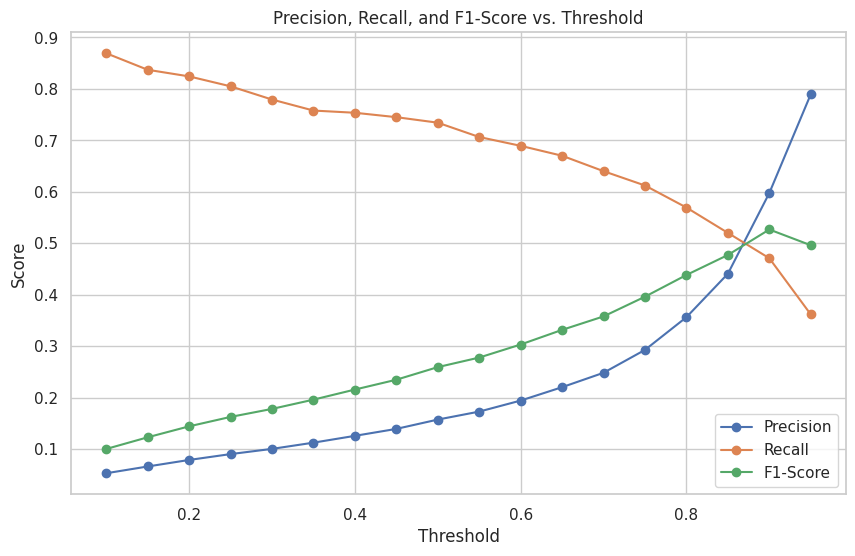

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Get the predicted probabilities for the positive class (fraud)
# Assuming best_lgbm_model is your trained model (either the initial one or the one from tuning)
# If you haven't run tuning yet, replace best_lgbm_model with lgbm_model
y_pred_proba = lgbm_model.predict_proba(X_test_scaled)[:, 1]

# Define a range of thresholds to test
thresholds = np.arange(0.1, 1.0, 0.05) # Example: from 0.1 to 0.95 with step 0.05

print("Evaluating model performance at different thresholds:")
print("------------------------------------------------------")
print("Threshold | Precision | Recall  | F1-Score")
print("------------------------------------------------------")

results = []
for threshold in thresholds:
    # Predict classes based on the current threshold
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)

    # Calculate evaluation metrics
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold, zero_division=0)
    f1 = f1_score(y_test, y_pred_threshold, zero_division=0)

    results.append({'Threshold': threshold, 'Precision': precision, 'Recall': recall, 'F1-Score': f1})

    print(f"{threshold:.2f}    | {precision:.4f}  | {recall:.4f}  | {f1:.4f}")

print("------------------------------------------------------")

# Optionally, you can convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)
# display(results_df)

# You can visualize the trade-off between Precision and Recall
plt.figure(figsize=(10, 6))
plt.plot(results_df['Threshold'], results_df['Precision'], label='Precision', marker='o')
plt.plot(results_df['Threshold'], results_df['Recall'], label='Recall', marker='o')
plt.plot(results_df['Threshold'], results_df['F1-Score'], label='F1-Score', marker='o')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

Evaluation at Threshold = 0.8:

Confusion Matrix:
 [[350521    480]
 [   201    266]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    351001
           1       0.36      0.57      0.44       467

    accuracy                           1.00    351468
   macro avg       0.68      0.78      0.72    351468
weighted avg       1.00      1.00      1.00    351468



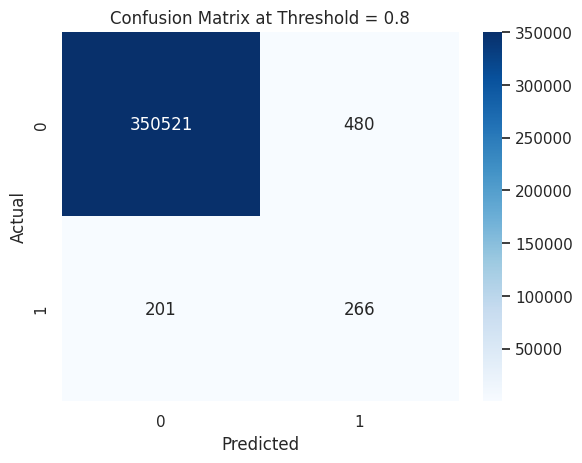

In [ ]:
# Apply the chosen threshold (0.8) to the predicted probabilities
y_pred_threshold_08 = (y_pred_proba >= 0.8).astype(int)

# Evaluate the model at the 0.8 threshold
print(f"Evaluation at Threshold = 0.8:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold_08))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold_08, zero_division=0))

# Optional: Visualize the confusion matrix for the chosen threshold
sns.heatmap(confusion_matrix(y_test, y_pred_threshold_08), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix at Threshold = 0.8')
plt.show()

Evaluation at Threshold = 0.95:

Confusion Matrix:
 [[350956     45]
 [   298    169]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    351001
           1       0.79      0.36      0.50       467

    accuracy                           1.00    351468
   macro avg       0.89      0.68      0.75    351468
weighted avg       1.00      1.00      1.00    351468



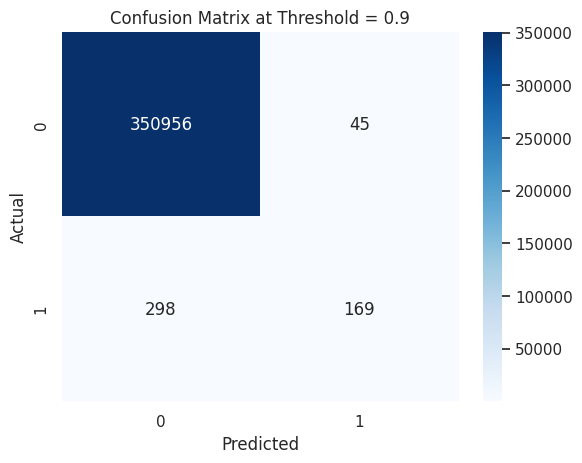

In [ ]:
# Apply the chosen threshold (0.9) to the predicted probabilities
y_pred_threshold_09 = (y_pred_proba >= 0.95).astype(int)

# Evaluate the model at the 0.9 threshold
print(f"Evaluation at Threshold = 0.95:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold_09))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold_09, zero_division=0))

# Optional: Visualize the confusion matrix for the chosen threshold
sns.heatmap(confusion_matrix(y_test, y_pred_threshold_09), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix at Threshold = 0.9')
plt.show()

#3.2 XGBoost
* Nó cung cấp hiệu suất cao và có nhiều tính năng giúp kiểm soát overfitting.

In [ ]:
# Install XGBoost if you haven't already
%pip install xgboost

import xgboost as xgb

# Initialize the XGBoost classifier
# You can adjust hyperparameters later
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42, n_jobs=-1)

# Train the model using the resampled training data
print("Training XGBoost model...")
xgb_model.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

Training XGBoost model...
Training complete.


XGBoost Model Evaluation:
------------------------------------------------------
ROC_AUC_SCORE: 0.984556099808448
Confusion_matrix:
 [[350368    633]
 [   157    310]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    351001
           1       0.33      0.66      0.44       467

    accuracy                           1.00    351468
   macro avg       0.66      0.83      0.72    351468
weighted avg       1.00      1.00      1.00    351468



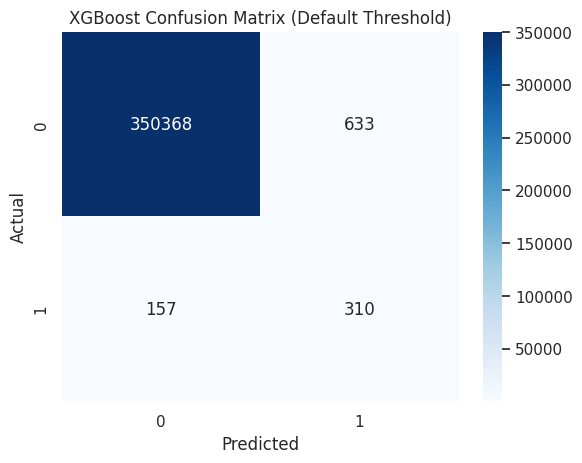

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for ROC AUC

# Evaluate the XGBoost model
print("XGBoost Model Evaluation:")
print("------------------------------------------------------")
print("ROC_AUC_SCORE:",roc_auc_score(y_test,y_pred_proba_xgb))
print("Confusion_matrix:\n",confusion_matrix(y_test,y_pred_xgb))
print("Classification_report:\n",classification_report(y_test,y_pred_xgb))

# Optional: Visualize the confusion matrix for the XGBoost model
sns.heatmap(confusion_matrix(y_test,y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (Default Threshold)')
plt.show()

#3.3 Logistic Regression
* Logistic Regression rất nhanh để huấn luyện và cung cấp một đường cơ sở (baseline) tốt để so sánh với các mô hình phức tạp hơn

Training Logistic Regression model...
Training complete.

Logistic Regression Model Evaluation:
------------------------------------------------------
ROC_AUC_SCORE: 0.8709334985026336
Confusion_matrix:
 [[250630 100371]
 [    55    412]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83    351001
           1       0.00      0.88      0.01       467

    accuracy                           0.71    351468
   macro avg       0.50      0.80      0.42    351468
weighted avg       1.00      0.71      0.83    351468



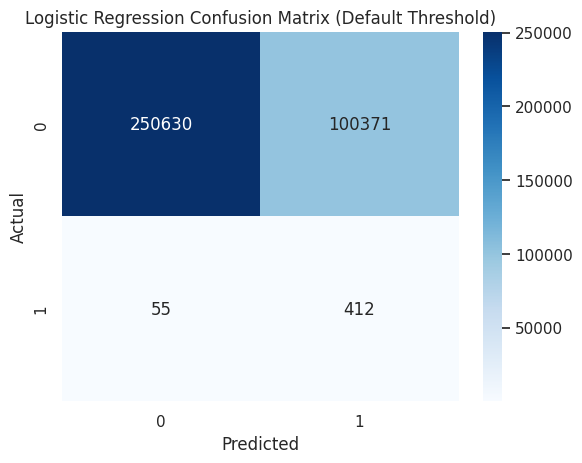

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the Logistic Regression model
# Use max_iter to ensure convergence, especially with large datasets
# Class weight can also be used, but SMOTE is already applied
log_reg_model = LogisticRegression(random_state=42, n_jobs=-1, max_iter=1000)

# Train the model using the resampled training data
print("Training Logistic Regression model...")
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Training complete.")

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1] # Get probabilities for ROC AUC

# Evaluate the Logistic Regression model
print("\nLogistic Regression Model Evaluation:")
print("------------------------------------------------------")
print("ROC_AUC_SCORE:", roc_auc_score(y_test, y_pred_proba_log_reg))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification_report:\n", classification_report(y_test, y_pred_log_reg))

# Optional: Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix (Default Threshold)')
plt.show()

#3.4 ENSEMBLE LEARNING
* Chúng ta sẽ sử dụng Voting Classifier để kết hợp dự đoán từ ba mô hình mà chúng ta đã huấn luyện: LightGBM, XGBoost và Logistic Regression.

Training Ensemble Model (Voting Classifier)...
Ensemble Training Complete.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Ensemble Model Evaluation (Voting Classifier):
------------------------------------------------------
ROC_AUC_SCORE: 0.9674061215208993
Confusion_matrix:
 [[349589   1412]
 [   128    339]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    351001
           1       0.19      0.73      0.31       467

    accuracy                           1.00    351468
   macro avg       0.60      0.86      0.65    351468
weighted avg       1.00      1.00      1.00    351468



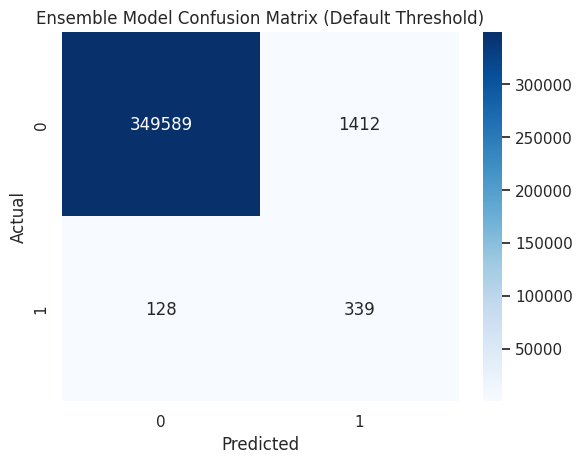

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the individual models
# Use the trained models (lgbm_model, xgb_model, log_reg_model)
# Consider using the best models found after tuning hyperparameters and threshold adjustment
# For simplicity here, we use the directly trained models
estimators = [
    ('lgbm', lgbm_model),
    ('xgb', xgb_model),
    ('log_reg', log_reg_model)
]

# Initialize the Voting Classifier
# 'soft' voting averages the predicted probabilities
# Weights can be assigned to give more importance to certain models
eclf1 = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)

# Train the ensemble model
print("Training Ensemble Model (Voting Classifier)...")
eclf1 = eclf1.fit(X_train_resampled, y_train_resampled)
print("Ensemble Training Complete.")

# Make predictions on the test set using the ensemble model
y_pred_ensemble = eclf1.predict(X_test_scaled)
y_pred_proba_ensemble = eclf1.predict_proba(X_test_scaled)[:, 1]

# Evaluate the ensemble model
print("\nEnsemble Model Evaluation (Voting Classifier):")
print("------------------------------------------------------")
print("ROC_AUC_SCORE:", roc_auc_score(y_test, y_pred_proba_ensemble))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification_report:\n", classification_report(y_test, y_pred_ensemble))

# Optional: Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_ensemble), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Ensemble Model Confusion Matrix (Default Threshold)')
plt.show()

Ensemble Model Evaluation at Threshold = 0.7:

Confusion Matrix:
 [[350652    349]
 [   193    274]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    351001
           1       0.44      0.59      0.50       467

    accuracy                           1.00    351468
   macro avg       0.72      0.79      0.75    351468
weighted avg       1.00      1.00      1.00    351468



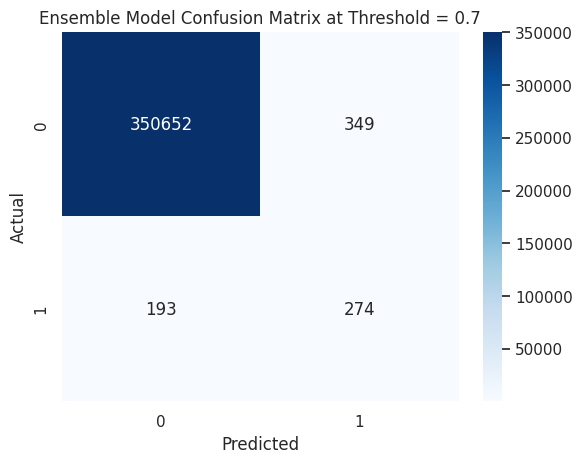

In [ ]:
# Apply the chosen threshold (0.7) to the predicted probabilities from the ensemble model
y_pred_threshold_07_ensemble = (y_pred_proba_ensemble >= 0.7).astype(int)

# Evaluate the ensemble model at the 0.7 threshold
print(f"Ensemble Model Evaluation at Threshold = 0.7:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_threshold_07_ensemble))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold_07_ensemble, zero_division=0))

# Optional: Visualize the confusion matrix for the chosen threshold
sns.heatmap(confusion_matrix(y_test, y_pred_threshold_07_ensemble), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Ensemble Model Confusion Matrix at Threshold = 0.7')
plt.show()

* Điều chỉnh trọng số lớp (Class Weights) trong mô hình

Calculated scale_pos_weight: 752.4147909967845
Training LightGBM model with scale_pos_weight...
[LightGBM] [Info] Number of positive: 1866, number of negative: 1404006
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.143492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2584
[LightGBM] [Info] Number of data points in the train set: 1405872, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001327 -> initscore=-6.623288
[LightGBM] [Info] Start training from score -6.623288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


ROC_AUC_SCORE: 0.8014842371862665
Confusion_matrix:
 [[280057  70944]
 [    91    376]]
Classification_report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89    351001
           1       0.01      0.81      0.01       467

    accuracy                           0.80    351468
   macro avg       0.50      0.80      0.45    351468
weighted avg       1.00      0.80      0.89    351468



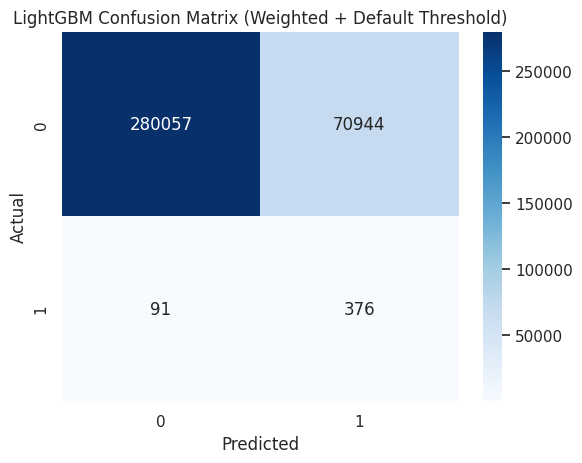

In [ ]:
# Install necessary libraries if you haven't already
%pip install lightgbm
%pip install imbalanced-learn
%pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import lightgbm as lgb

# Load data (Assuming TRAIN.csv and TEST.csv are available)
train_path = "/content/fraud_data/fraudTrain.csv"
test_path  = "/content/fraud_data/fraudTest.csv"

data_train = pd.read_csv(train_path)
data_test = pd.read_csv(test_path)

# Concatenate train and test data for initial exploration and preprocessing
df = pd.concat([data_train, data_test], axis=0)

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'unix_time', 'trans_num', 'street', 'city'], inplace=True, errors='ignore')

# Convert 'trans_date_trans_time' to datetime and extract time features
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], errors='coerce')
df['day'] = df['trans_date_trans_time'].dt.day
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year
df['hour'] = df['trans_date_trans_time'].dt.hour
df['minute'] = df['trans_date_trans_time'].dt.minute
df.drop(columns=['trans_date_trans_time'], inplace=True, errors='ignore')

# Handle 'dob' and create 'age' feature
df['dob'] = pd.to_datetime(df['dob'])
df['year_dob'] = df['dob'].dt.year
df['age'] = df['year'] - df['year_dob']
# Optional: create age_group if needed for visualization, but not for model training here
# bins = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
# df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


# Handle outliers in 'amt' using IQR
Q1 = df['amt'].quantile(0.25)
Q3 = df['amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[(df['amt'] >= lower_bound) & (df['amt'] <= upper_bound)].copy()


# Separate features and target variable from the cleaned data
X = df_cleaned.drop('is_fraud', axis=1)
y = df_cleaned['is_fraud']

# Drop columns that are not needed for training, including the original 'dob' and derived 'year_dob', 'age_group'
X = X.drop(columns=['dob', 'year_dob', 'age_group'], errors='ignore')


# Split the data into training and testing sets (e.g., 80% train, 20% test)
# Use stratify=y to maintain the proportion of fraud cases in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Define categorical columns for different encoding methods
onehot_cols = ['category', 'gender'] # Low cardinality
target_cols = ['merchant', 'state', 'job'] # High cardinality

# Get the names of the numerical columns remaining after dropping dob, year_dob, and age_group
# These are the columns not in onehot_cols or target_cols in the original X_train
numerical_cols = [col for col in X_train.columns if col not in onehot_cols + target_cols]


# Create ColumnTransformer
# Apply OneHotEncoder to onehot_cols, TargetEncoder to target_cols, and StandardScaler to numerical_cols
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols),
        ('target', TargetEncoder(), target_cols),
        ('scaler', StandardScaler(), numerical_cols) # Add StandardScaler here as well
    ],
    remainder='passthrough' # Should ideally be empty now after defining all columns
)

# Apply transformations
# Fit on X_train and y_train, then transform both X_train and X_test
X_train_scaled = preprocessor.fit_transform(X_train, y_train)
X_test_scaled = preprocessor.transform(X_test)


# Calculate the scale_pos_weight
# Ratio of negative class samples to positive class samples in the original training data
scale_pos_weight_value = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
print(f"Calculated scale_pos_weight: {scale_pos_weight_value}")

# Initialize the LightGBM classifier with scale_pos_weight
# You can adjust hyperparameters later
lgbm_model_weighted = lgb.LGBMClassifier(
    objective='binary',
    metric='binary_logloss',
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight_value # Add scale_pos_weight here
)

# Train the model using the original (scaled, encoded) training data (NOT resampled)
# When using scale_pos_weight, you typically train on the original imbalanced data
print("Training LightGBM model with scale_pos_weight...")
lgbm_model_weighted.fit(X_train_scaled, y_train) # Use X_train_scaled and y_train
print("Training complete.")

# Evaluate the model on the original test set
print("\nEvaluating LightGBM model with scale_pos_weight (Test Set):")
y_pred_weighted = lgbm_model_weighted.predict(X_test_scaled)
y_pred_proba_weighted = lgbm_model_weighted.predict_proba(X_test_scaled)[:, 1]

print("ROC_AUC_SCORE:", roc_auc_score(y_test, y_pred_proba_weighted))
print("Confusion_matrix:\n", confusion_matrix(y_test, y_pred_weighted))
print("Classification_report:\n", classification_report(y_test, y_pred_weighted))

# Optional: Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_weighted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Confusion Matrix (Weighted + Default Threshold)')
plt.show()

#BƯỚC 4: ĐÁNH GIÁ MÔ HÌNH

### Đánh giá Mô hình Ensemble (Voting Classifier) tại Ngưỡng 0.7

Dựa trên kết quả đánh giá trên tập kiểm tra, mô hình Ensemble khi sử dụng ngưỡng phân loại 0.7 cho thấy hiệu suất như sau:

*   **Precision (Gian lận):** ~0.44
*   **Recall (Gian lận):** ~0.59
*   **F1-Score (Gian lận):** ~0.50
*   **ROC AUC:** ~0.9674 (Kết quả ROC AUC được tính dựa trên xác suất, không phụ thuộc vào ngưỡng cụ thể, giá trị này lấy từ đánh giá mặc định nhưng vẫn đúng cho mô hình)

**Ma trận nhầm lẫn (Confusion Matrix):**
* False Positives (Báo cáo sai): 349
* False Negatives (Bỏ sót gian lận): 193
* So với ngưỡng mặc định (Precision 0.19, Recall 0.73), ngưỡng 0.7 đã giúp tăng đáng kể Precision (từ 0.19 lên 0.44) và giảm số lượng báo cáo sai (từ 1412 xuống 349). Tuy nhiên, nó cũng làm giảm Recall (từ 0.73 xuống 0.59) và tăng số lượng giao dịch gian lận bị bỏ sót (từ 128 lên 193).